In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-wisconsin-data/data.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pandas import plotting

#plotly 
import plotly.offline as py
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
init_notebook_mode(connected=True)
import plotly.figure_factory as ff
import plotly.express as px

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn import neighbors
from sklearn.metrics import confusion_matrix,classification_report,precision_score
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
import statsmodels.formula.api as smf

sns.set(style="whitegrid")

In [3]:
df=pd.read_csv('../input/breast-cancer-wisconsin-data/data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.describe(percentiles=[0.1,0.25,0.45,0.55,0.75,0.95]).T

,count,mean,std,min,10%,25%,45%,50%,55%,75%,95%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,853155.400000,869218.000000,901310.200000,906024.000000,911506.400000,8.813129e+06,9.042446e+07,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,10.260000,11.700000,12.996000,13.370000,13.694000,1.578000e+01,2.057600e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,14.078000,16.170000,18.342000,18.840000,19.362000,2.180000e+01,2.715000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,65.830000,75.170000,84.066000,86.240000,88.370000,1.041000e+02,1.358200e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,321.600000,420.300000,518.280000,551.100000,578.060000,7.827000e+02,1.309800e+03,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.079654,0.086370,0.094034,0.095870,0.097734,1.053000e-01,1.187800e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.049700,0.064920,0.085074,0.092630,0.101740,1.304000e-01,2.087000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.013686,0.029560,0.052838,0.061540,0.071450,1.307000e-01,2.430200e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.011158,0.020310,0.029998,0.033500,0.040196,7.400000e-02,1.257400e-01,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.149580,0.161900,0.175620,0.179200,0.181840,1.957000e-01,2.307200e-01,3.040000e-01


In [5]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [6]:
col = "diagnosis"
grouped = df[col].value_counts().reset_index()
grouped = grouped.rename(columns = {col : "count", "index" : col})

## plot
trace = go.Pie(labels=grouped[col], values=grouped['count'], pull=[0.05, 0], marker=dict(colors=["#6ad49b", "#a678de"]))
layout = go.Layout(title="", height=600, legend=dict(x=0.1, y=1.1))
fig = go.Figure(data = [trace], layout = layout)
iplot(fig)

In [7]:
for i in df:
    null=df[i].isnull().sum()/len(df)
    if null>0:
        print("{} 's null rate {} %".format(i, null))
    

Unnamed: 32 's null rate 1.0 %


In [8]:
fig=px.scatter_3d(x=df['radius_mean'], y=df['texture_mean'], z=df['area_mean'], size=df['texture_mean'],
                 hover_data=[df['diagnosis']])

fig.show()

In [9]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


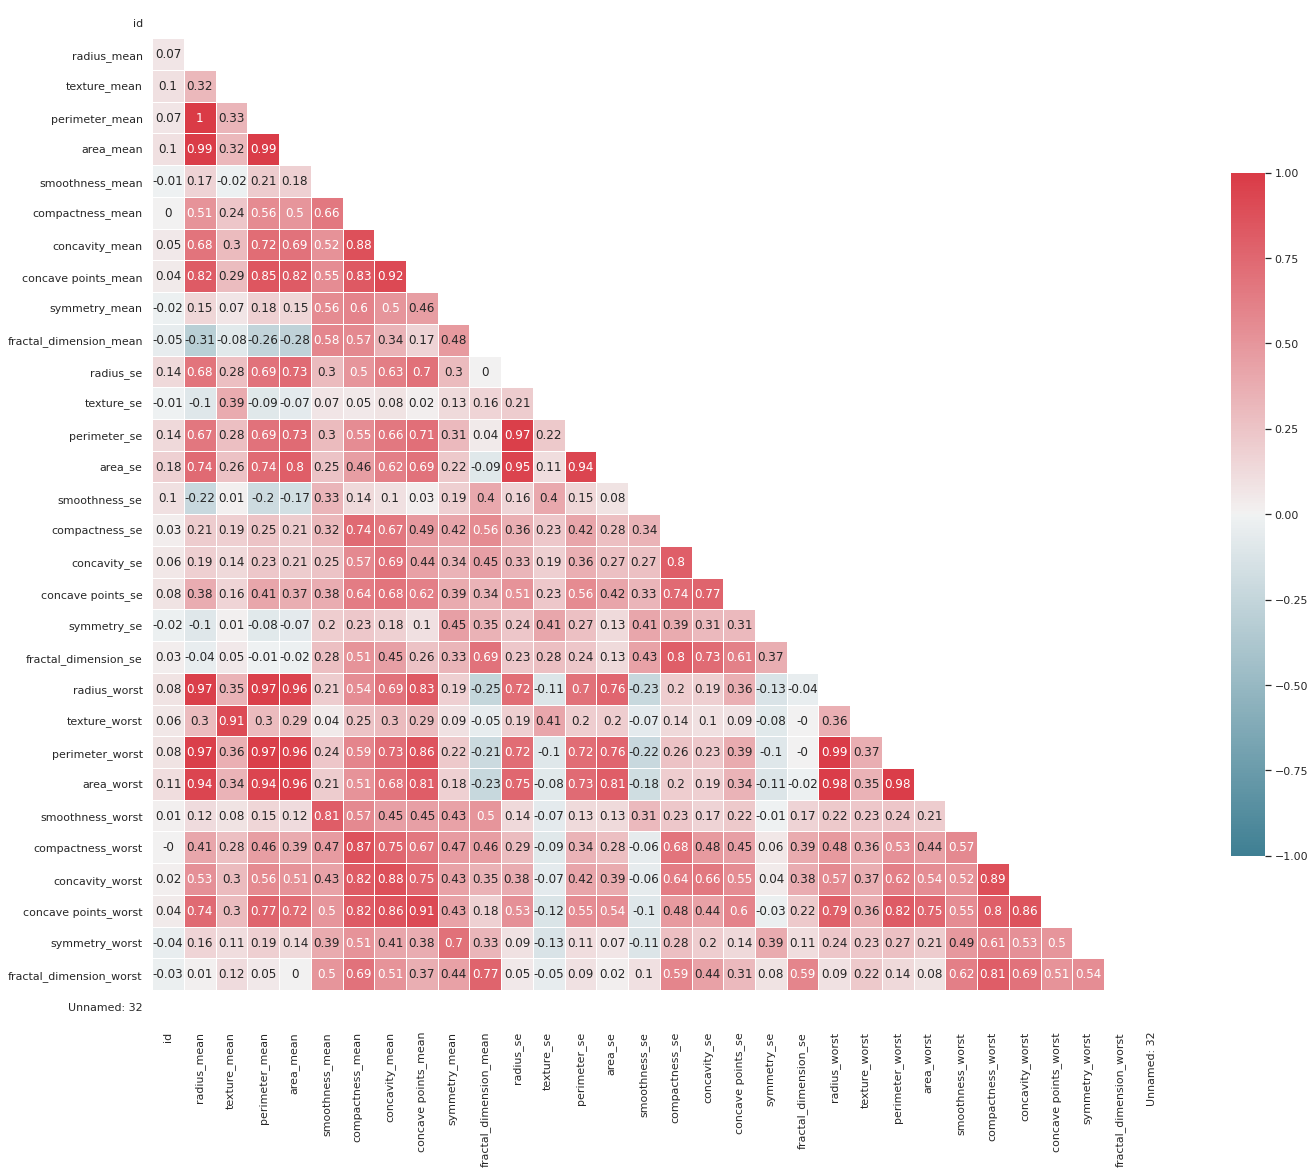

In [10]:
corr = df.corr().round(2)

# Mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set figure size
f, ax = plt.subplots(figsize=(20, 20))

# Define custom colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.tight_layout()

# AS we can see the some of the correlation are very high/ These may be due to the multcolinearity. We need to use VIF 

In [11]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
cols=['diagnosis', 'Unnamed: 32']
X=df.drop(cols, axis=1)

In [13]:
X.columns

Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [14]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_data)

                    feature           VIF
0                        id      1.163246
1               radius_mean  63309.441555
2              texture_mean    251.432664
3            perimeter_mean  58123.587378
4                 area_mean   1287.411538
5           smoothness_mean    393.514898
6          compactness_mean    201.166758
7            concavity_mean    157.899635
8       concave points_mean    154.297834
9             symmetry_mean    184.429153
10   fractal_dimension_mean    629.688286
11                radius_se    237.257123
12               texture_se     24.758627
13             perimeter_se    211.410744
14                  area_se     73.436569
15            smoothness_se     26.330278
16           compactness_se     44.948568
17             concavity_se     33.254271
18        concave points_se     54.030035
19              symmetry_se     37.207715
20     fractal_dimension_se     27.549724
21             radius_worst   9677.820028
22            texture_worst    343

In [15]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [16]:
df['diagnosis']

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [17]:
diagnosis={'M':1, 'B':0}
df['diagnosis']=[diagnosis[x] for x in df['diagnosis']]

In [18]:
df['diagnosis']

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [19]:
X=df.drop('Unnamed: 32', axis=1)
y=df['diagnosis']
X_train, x_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=10)

# Logistic Regresion

In [20]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay

In [21]:
import statsmodels.api as sm
import statsmodels.formula.api as smf


In [22]:
lr=LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [23]:
y_pred=lr.predict(X_train)


In [24]:
print("Accuracy Score:-", metrics.accuracy_score(y_train, y_pred))
print("F1 Score:-", metrics.f1_score(y_train, y_pred))
print("Average Precision Score:-", metrics.average_precision_score(y_train, y_pred))
print("Log Loss:-", metrics.log_loss(y_train, y_pred))
print("Precision Score:-", metrics.precision_score(y_train, y_pred))
print("Recall Score:-", metrics.recall_score(y_train, y_pred))
print("ROC-AUC Score:-", metrics.roc_auc_score(y_train, y_pred))

Accuracy Score:- 0.3844221105527638
F1 Score:- 0.5553539019963702
Average Precision Score:- 0.3844221105527638
Log Loss:- 21.261799291767623
Precision Score:- 0.3844221105527638
Recall Score:- 1.0
ROC-AUC Score:- 0.5


In [25]:
y_test_pred=lr.predict(x_test)


In [26]:
lr_acc=metrics.accuracy_score(y_test, y_test_pred)
print("Accuracy Score:-",lr_acc)
print("F1 Score:-", metrics.f1_score(y_test, y_test_pred))
print("Average Precision Score:-", metrics.average_precision_score(y_test, y_test_pred))
print("Log Loss:-", metrics.log_loss(y_test, y_test_pred))
print("Precision Score:-", metrics.precision_score(y_test, y_test_pred))
print("Recall Score:-", metrics.recall_score(y_test, y_test_pred))
print("ROC-AUC Score:-", metrics.roc_auc_score(y_test, y_test_pred))

Accuracy Score:- 0.34502923976608185
F1 Score:- 0.5130434782608695
Average Precision Score:- 0.34502923976608185
Log Loss:- 22.622412345860692
Precision Score:- 0.34502923976608185
Recall Score:- 1.0
ROC-AUC Score:- 0.5


In [27]:
cfm=confusion_matrix(y_test, y_test_pred)


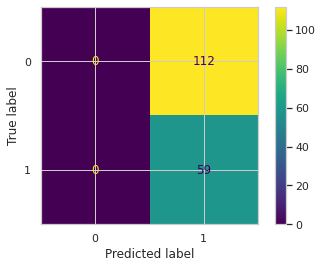

In [28]:
disp = ConfusionMatrixDisplay(confusion_matrix=cfm,
                               display_labels=lr.classes_)
disp.plot() 


In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       112
           1       0.35      1.00      0.51        59

    accuracy                           0.35       171
   macro avg       0.17      0.50      0.26       171
weighted avg       0.12      0.35      0.18       171



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [30]:
y_test_pred_prob=lr.predict_proba(x_test)[:,1]
y_test_pred_prob

from sklearn.metrics import roc_curve

In [31]:
metrics.roc_auc_score(y_test, y_test_pred_prob)


0.34866828087167073

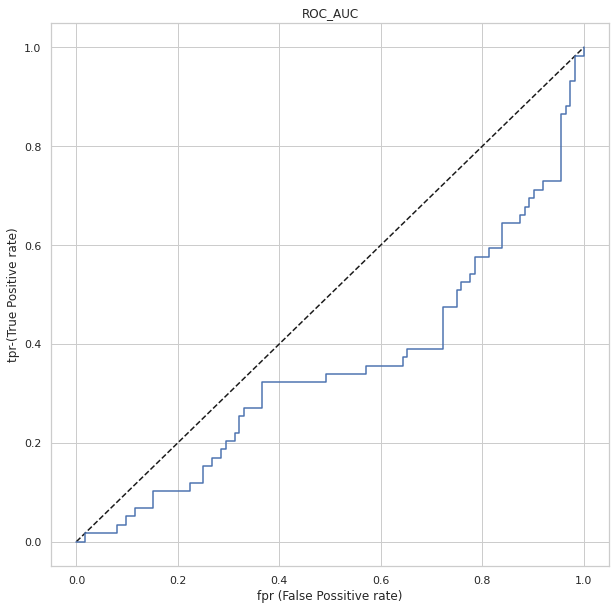

In [32]:
fpr, tpr,thresholds=roc_curve(y_test,y_test_pred_prob)
plt.figure(figsize=(10,10))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel("fpr (False Possitive rate)")
plt.ylabel("tpr-(True Positive rate)")
plt.title("ROC_AUC")
plt.show()

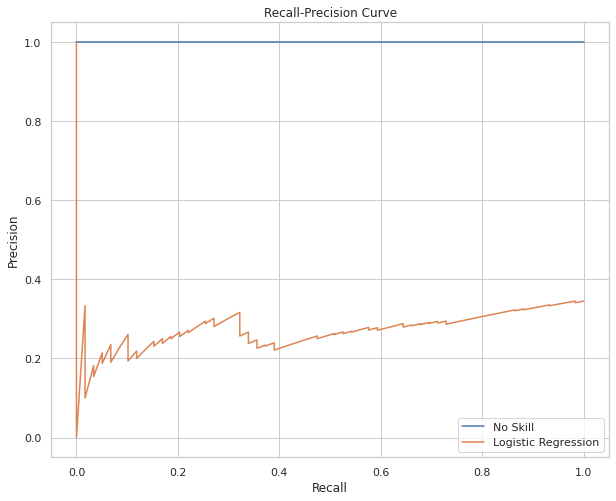

In [33]:
from sklearn.metrics import precision_recall_curve
no_skill=len(y==1)/len(y)
y_test_prob=lr.predict_proba(x_test)[:,1]
plt.figure(figsize=(10,8))
plt.plot([0,1],[no_skill, no_skill], label="No Skill")
precision, recall,_ =precision_recall_curve(y_test, y_test_prob)
plt.plot(recall, precision, marker='',label="Logistic Regression")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Recall-Precision Curve")
plt.legend()
plt.show()

In [34]:
# predict the test data and show the first 5 predictions
predict=lr.predict(x_test)
predict[1:6]

array([1, 1, 1, 1, 1])

In [35]:
#Convert the numericalinto nominal value and check the few result

prediction_nominal=['M' if x<0.1 else 'B' for x in predict ]
prediction_nominal[1:6]

['B', 'B', 'B', 'B', 'B']

# K-NN

In [36]:
from sklearn.neighbors import KNeighborsClassifier

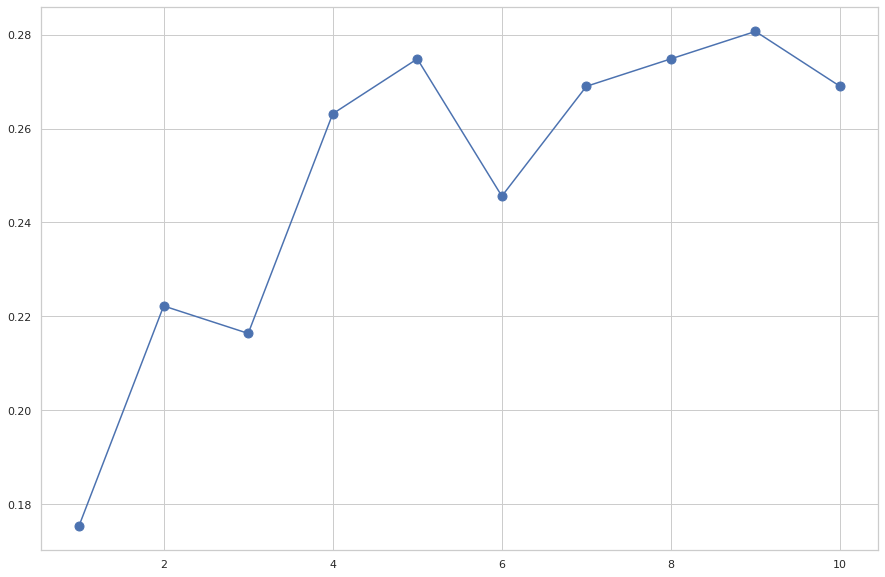

In [37]:
error_rate=[]

for i in range(1,11):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred=knn.predict(x_test)
    error_rate.append(np.mean(pred!=y_test))
    
plt.figure(figsize=(15,10))
plt.plot(range(1,11), error_rate,marker='o', markersize=9)

# Conclusion:- 
* As we can see that the optimum K in KNN we get is K=6

In [38]:
knn=KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [39]:
y_pred=knn.predict(X_train)


In [40]:
print("Accuracy Score:-", metrics.accuracy_score(y_train, y_pred))
print("F1 Score:-", metrics.f1_score(y_train, y_pred))
print("Average Precision Score:-", metrics.average_precision_score(y_train, y_pred))
print("Log Loss:-", metrics.log_loss(y_train, y_pred))
print("Precision Score:-", metrics.precision_score(y_train, y_pred))
print("Recall Score:-", metrics.recall_score(y_train, y_pred))
print("ROC-AUC Score:-", metrics.roc_auc_score(y_train, y_pred))

Accuracy Score:- 0.7638190954773869
F1 Score:- 0.5765765765765766
Average Precision Score:- 0.6116071024821941
Log Loss:- 8.157409495248128
Precision Score:- 0.927536231884058
Recall Score:- 0.41830065359477125
ROC-AUC Score:- 0.6989462451647326


In [41]:
y_test_pred=knn.predict(x_test)


In [42]:
knn_acc=metrics.accuracy_score(y_test, y_test_pred)
print("Accuracy Score:-",lr_acc)
print("F1 Score:-", metrics.f1_score(y_test, y_test_pred))
print("Average Precision Score:-", metrics.average_precision_score(y_test, y_test_pred))
print("Log Loss:-", metrics.log_loss(y_test, y_test_pred))
print("Precision Score:-", metrics.precision_score(y_test, y_test_pred))
print("Recall Score:-", metrics.recall_score(y_test, y_test_pred))
print("ROC-AUC Score:-", metrics.roc_auc_score(y_test, y_test_pred))

Accuracy Score:- 0.34502923976608185
F1 Score:- 0.4473684210526315
Average Precision Score:- 0.5337496283080583
Log Loss:- 8.483208237346485
Precision Score:- 1.0
Recall Score:- 0.288135593220339
ROC-AUC Score:- 0.6440677966101696


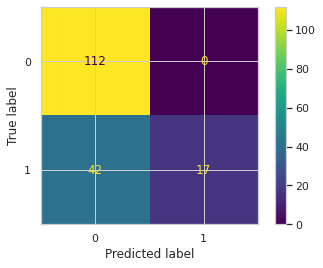

In [43]:
cfm=confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cfm,
                               display_labels=knn.classes_)
disp.plot() 

In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.73      1.00      0.84       112
           1       1.00      0.29      0.45        59

    accuracy                           0.75       171
   macro avg       0.86      0.64      0.64       171
weighted avg       0.82      0.75      0.71       171



In [45]:
y_test_pred_prob=knn.predict_proba(x_test)[:,1]
y_test_pred_prob

from sklearn.metrics import roc_curve

In [46]:
metrics.roc_auc_score(y_test, y_test_pred_prob)


0.7753480629539952

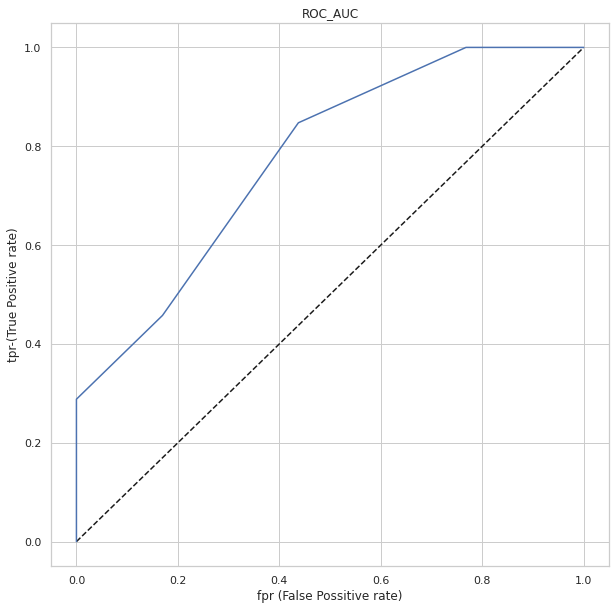

In [47]:
fpr, tpr,thresholds=roc_curve(y_test,y_test_pred_prob)
plt.figure(figsize=(10,10))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel("fpr (False Possitive rate)")
plt.ylabel("tpr-(True Positive rate)")
plt.title("ROC_AUC")
plt.show()

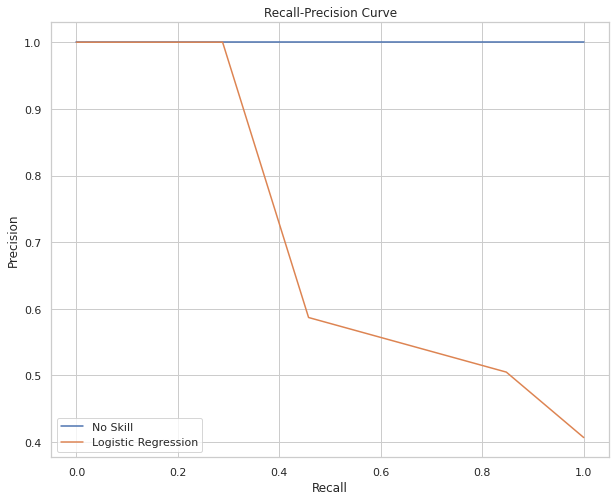

In [48]:
from sklearn.metrics import precision_recall_curve
no_skill=len(y==1)/len(y)
y_test_prob=knn.predict_proba(x_test)[:,1]
plt.figure(figsize=(10,8))
plt.plot([0,1],[no_skill, no_skill], label="No Skill")
precision, recall,_ =precision_recall_curve(y_test, y_test_prob)
plt.plot(recall, precision, marker='',label="Logistic Regression")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Recall-Precision Curve")
plt.legend()
plt.show()

In [49]:
# predict the test data and show the first 5 predictions
predict=knn.predict(x_test)
predict[1:6]

array([0, 0, 0, 0, 0])

In [50]:

prediction_nominal=['M' if x<0.1 else 'B' for x in predict ]
prediction_nominal[1:6]

['M', 'M', 'M', 'M', 'M']

# SVC -Support Vector Classifier

In [51]:
from sklearn.svm import SVC
from sklearn import metrics

# Data Standardisation
Standardization refers to shifting the distribution of each attribute to have a mean of zero and a standard deviation of one (unit variance). It is useful to standardize attributes for a model. Standardization of datasets is a common requirement for many machine learning estimators implemented in scikit-learn; they might behave badly if the individual features do not more or less look like standard normally distributed data.

In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [54]:
svc=SVC() #Default hyperparameters
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.9912280701754386


# Default Linear kernel

In [55]:
svc=SVC(kernel='linear')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
1.0


# Default RBF kernel

In [56]:
svc=SVC(kernel='rbf')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.9912280701754386


In [57]:
kernel=['linear', 'rbf', 'poly', 'sigmoid']
for i in kernel:
    svc=SVC(kernel=i)
    svc.fit(X_train,y_train)
    y_pred=svc.predict(X_test)
    print("{} :- {} ".format(i, metrics.accuracy_score(y_test,y_pred)))

linear :- 1.0 
rbf :- 0.9912280701754386 
poly :- 0.9385964912280702 
sigmoid :- 0.9912280701754386 


* As we can see that the acuraccy score for Linear KERNAL is very well . SInce the we are getting higher accuracy , it can be due to overfitting using LINEAR kernel.
* But as it is clear that using the "rbf" and "sigmoid" will function well and produces the 99% accuracy.


# Performing K-fold cross validation with different kernels
* CV on Linear kernel

In [58]:
from sklearn.model_selection import cross_val_score    
svc=SVC(kernel="linear")
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy') #cv is cross validation
print(scores)
print("----------------")
print(scores.mean())

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
----------------
1.0


# Conclusion:-
* It is quite clear that it is overfitting
* SO we are not gonna use this kernel
* Look at  the other kernels

In [59]:
from sklearn.model_selection import cross_val_score    
svc=SVC(kernel="rbf")
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy') #cv is cross validation
print(scores)
print("-------------------")
print(scores.mean())

[0.98245614 0.98245614 1.         1.         1.         1.
 1.         1.         1.         1.        ]
-------------------
0.9964912280701753


In [60]:
from sklearn.model_selection import cross_val_score    
svc=SVC(kernel="poly")
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy') #cv is cross validation
print(scores)
print("-------------------")
print(scores.mean())

[0.96491228 0.87719298 0.89473684 0.89473684 0.92982456 0.96491228
 0.94736842 0.96491228 1.         0.96428571]
-------------------
0.9402882205513784


In [61]:
from sklearn.model_selection import cross_val_score    
svc=SVC(kernel="sigmoid")
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy') #cv is cross validation
print(scores)
print("-------------------")
print(scores.mean())

[0.92982456 0.98245614 0.96491228 0.98245614 0.98245614 0.98245614
 0.98245614 0.94736842 1.         1.        ]
-------------------
0.9754385964912281


# Coclusion:-
* As we are gonna use the SIGMOID kernel 
* Its accuracy is quite good
* I think it is doing well 
* Henc it is best

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


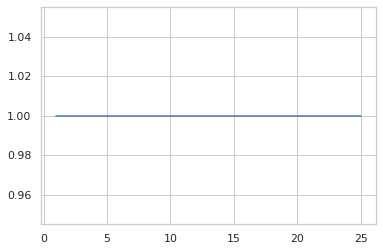

In [62]:
C_range=list(range(1,26))
acc_score=[]
for c in C_range:
    svc = SVC(kernel='linear', C=c)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
plt.plot(range(1,26), acc_score)
print(acc_score)

[0.9964912280701753, 0.9964912280701753, 0.9964912280701753, 0.9964912280701753, 0.9964912280701753, 0.9964912280701753, 0.9964912280701753, 0.9964912280701753, 0.9964912280701753, 0.9964912280701753, 0.9964912280701753, 0.9964912280701753, 0.9964912280701753, 0.9964912280701753, 0.9964912280701753, 0.9964912280701753, 0.9964912280701753, 0.9964912280701753, 0.9964912280701753, 0.9964912280701753, 0.9964912280701753, 0.9964912280701753, 0.9964912280701753, 0.9964912280701753, 0.9964912280701753]


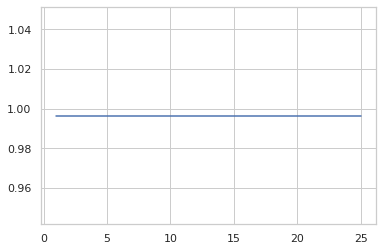

In [63]:
C_range=list(range(1,26))
acc_score=[]
for c in C_range:
    svc = SVC(kernel='rbf', C=c)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
plt.plot(range(1,26), acc_score)
print(acc_score)

[0.9402882205513784, 0.9666040100250625, 0.9753759398496239, 0.9806390977443608, 0.982393483709273, 0.9841791979949874, 0.987719298245614, 0.987719298245614, 0.9894736842105264, 0.9894736842105264, 0.9912280701754386, 0.9912280701754386, 0.9912280701754386, 0.9912280701754386, 0.9929824561403509, 0.9929824561403509, 0.9929824561403509, 0.9929824561403509, 0.9929824561403509, 0.9929824561403509, 0.9929824561403509, 0.9947368421052631, 0.9947368421052631, 0.9947368421052631, 0.9947368421052631]


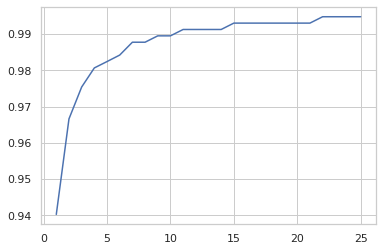

In [64]:
C_range=list(range(1,26))
acc_score=[]
for c in C_range:
    svc = SVC(kernel='poly', C=c)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
plt.plot(range(1,26), acc_score)
print(acc_score)

[0.9754385964912281, 0.9648496240601503, 0.9648496240601503, 0.9648809523809524, 0.968421052631579, 0.9683583959899748, 0.9666666666666666, 0.9631265664160402, 0.9613721804511279, 0.9613721804511279, 0.9578634085213034, 0.9613721804511279, 0.9578634085213034, 0.9613721804511279, 0.9613721804511279, 0.9561090225563911, 0.9543233082706767, 0.9543233082706767, 0.9560776942355889, 0.9578634085213033, 0.9543233082706767, 0.9543546365914788, 0.9543233082706767, 0.9561090225563911, 0.9543233082706767]


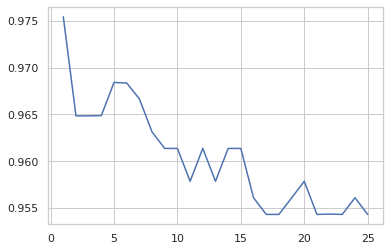

In [65]:
C_range=list(range(1,26))
acc_score=[]
for c in C_range:
    svc = SVC(kernel='sigmoid', C=c)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
plt.plot(range(1,26), acc_score)
print(acc_score)

[0.6274122807017544, 0.9349937343358397, 0.9929824561403509, 0.9754385964912281, 0.9613721804511279]


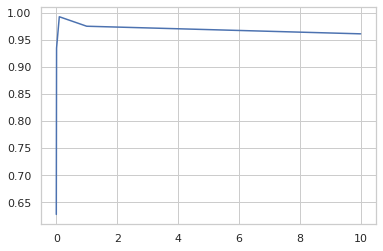

In [66]:
C_range=[0.001, 0.01, 0.1, 1.0, 10]
acc_score=[]
for c in C_range:
    svc = SVC(kernel='sigmoid', C=c)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
plt.plot(C_range, acc_score)
print(acc_score)

[0.6274122807017544, 0.6678571428571429, 0.9859649122807017, 0.9964912280701753, 0.9964912280701753]


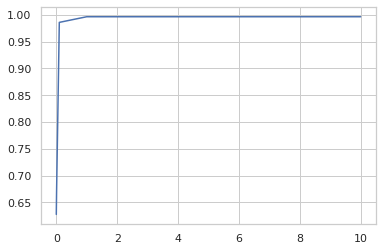

In [67]:
C_range=[0.001, 0.01, 0.1, 1.0, 10]
acc_score=[]
for c in C_range:
    svc = SVC(kernel='rbf', C=c)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
plt.plot(C_range, acc_score)
print(acc_score)

[0.6432330827067669, 0.7153195488721804, 0.8576754385964913, 0.9402882205513784, 0.9894736842105264]


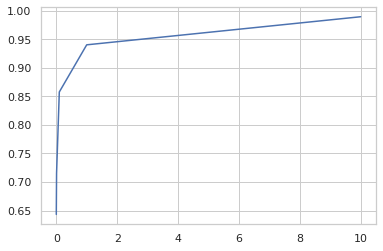

In [68]:
C_range=[0.001, 0.01, 0.1, 1.0, 10]
acc_score=[]
for c in C_range:
    svc = SVC(kernel='poly', C=c)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
plt.plot(C_range, acc_score)
print(acc_score)

# Conclusion:
* As we can see that as C value increase the accuracy is increasing respective of the KERNEl
* Since C is the hyperparameter
* As C increase the Overfitting occurs.
* AS C decreases the underfitting occures.


# Hence 
* we will use the KERNEL-Polynomial and C=1.0

In [69]:
svc=SVC(kernel='poly', C=1.0) #Default hyperparameters
svc.fit(X_train,y_train)
y_pred=svc.predict(X_train)


In [70]:
print("Accuracy Score:-", metrics.accuracy_score(y_train, y_pred))
print("F1 Score:-", metrics.f1_score(y_train, y_pred))
print("Average Precision Score:-", metrics.average_precision_score(y_train, y_pred))
print("Log Loss:-", metrics.log_loss(y_train, y_pred))
print("Precision Score:-", metrics.precision_score(y_train, y_pred))
print("Recall Score:-", metrics.recall_score(y_train, y_pred))
print("ROC-AUC Score:-", metrics.roc_auc_score(y_train, y_pred))

Accuracy Score:- 0.9384615384615385
F1 Score:- 0.9102564102564102
Average Precision Score:- 0.8968325791855204
Log Loss:- 2.1254631627637353
Precision Score:- 1.0
Recall Score:- 0.8352941176470589
ROC-AUC Score:- 0.9176470588235295


In [71]:
y_test_pred=svc.predict(X_test)


In [72]:
svc_acc=metrics.accuracy_score(y_test, y_test_pred)
print("Accuracy Score:-",svc_acc)
print("F1 Score:-", metrics.f1_score(y_test, y_test_pred))
print("Average Precision Score:-", metrics.average_precision_score(y_test, y_test_pred))
print("Log Loss:-", metrics.log_loss(y_test, y_test_pred))
print("Precision Score:-", metrics.precision_score(y_test, y_test_pred))
print("Recall Score:-", metrics.recall_score(y_test, y_test_pred))
print("ROC-AUC Score:-", metrics.roc_auc_score(y_test, y_test_pred))

Accuracy Score:- 0.9385964912280702
F1 Score:- 0.9090909090909091
Average Precision Score:- 0.8947368421052632
Log Loss:- 2.1208020593366212
Precision Score:- 1.0
Recall Score:- 0.8333333333333334
ROC-AUC Score:- 0.9166666666666667


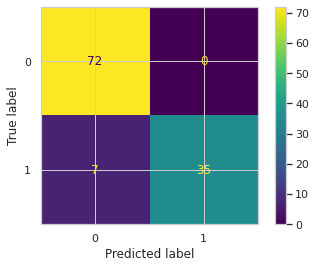

In [73]:
cfm=confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cfm,
                               display_labels=svc.classes_)
disp.plot()

In [74]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        72
           1       1.00      0.83      0.91        42

    accuracy                           0.94       114
   macro avg       0.96      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114



In [75]:
y_test_pred_prob=lr.predict_proba(X_test)[:,1]
y_test_pred_prob

from sklearn.metrics import roc_curve

In [76]:
metrics.roc_auc_score(y_test, y_test_pred_prob)


0.6266534391534392

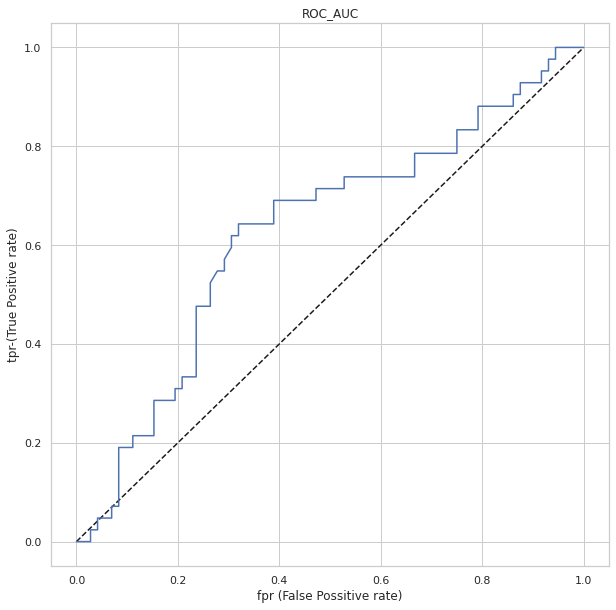

In [77]:
fpr, tpr,thresholds=roc_curve(y_test,y_test_pred_prob)
plt.figure(figsize=(10,10))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel("fpr (False Possitive rate)")
plt.ylabel("tpr-(True Positive rate)")
plt.title("ROC_AUC")
plt.show()

# Decision Tree Clasifiers

In [78]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

In [79]:
X=df.drop('Unnamed: 32', axis=1)
y=df['diagnosis']
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=10)

In [80]:
# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [81]:
y_pred_gini = clf_gini.predict(X_train)

In [82]:
print("Accuracy Score:-", metrics.accuracy_score(y_train, y_pred_gini))
print("F1 Score:-", metrics.f1_score(y_train, y_pred_gini))
print("Average Precision Score:-", metrics.average_precision_score(y_train, y_pred_gini))
print("Log Loss:-", metrics.log_loss(y_train, y_pred_gini))
print("Precision Score:-", metrics.precision_score(y_train, y_pred_gini))
print("Recall Score:-", metrics.recall_score(y_train, y_pred_gini))
print("ROC-AUC Score:-", metrics.roc_auc_score(y_train, y_pred_gini))

Accuracy Score:- 1.0
F1 Score:- 1.0
Average Precision Score:- 1.0
Log Loss:- 9.992007221626413e-16
Precision Score:- 1.0
Recall Score:- 1.0
ROC-AUC Score:- 1.0


In [83]:
y_test_pred= clf_gini.predict(X_test)

In [84]:
dc_acc=metrics.accuracy_score(y_test, y_test_pred)
print("Accuracy Score:-",dc_acc)
print("F1 Score:-", metrics.f1_score(y_test, y_test_pred))
print("Average Precision Score:-", metrics.average_precision_score(y_test, y_test_pred))
print("Log Loss:-", metrics.log_loss(y_test, y_test_pred))
print("Precision Score:-", metrics.precision_score(y_test, y_test_pred))
print("Recall Score:-", metrics.recall_score(y_test, y_test_pred))
print("ROC-AUC Score:-", metrics.roc_auc_score(y_test, y_test_pred))

Accuracy Score:- 1.0
F1 Score:- 1.0
Average Precision Score:- 1.0
Log Loss:- 9.992007221626413e-16
Precision Score:- 1.0
Recall Score:- 1.0
ROC-AUC Score:- 1.0


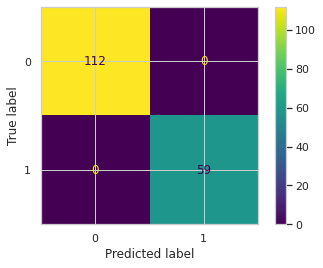

In [85]:
cfm=confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cfm,
                               display_labels=clf_gini.classes_)
disp.plot()

In [86]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       112
           1       1.00      1.00      1.00        59

    accuracy                           1.00       171
   macro avg       1.00      1.00      1.00       171
weighted avg       1.00      1.00      1.00       171



In [87]:
y_test_pred_prob=clf_gini.predict_proba(X_test)[:,1]
y_test_pred_prob

from sklearn.metrics import roc_curve

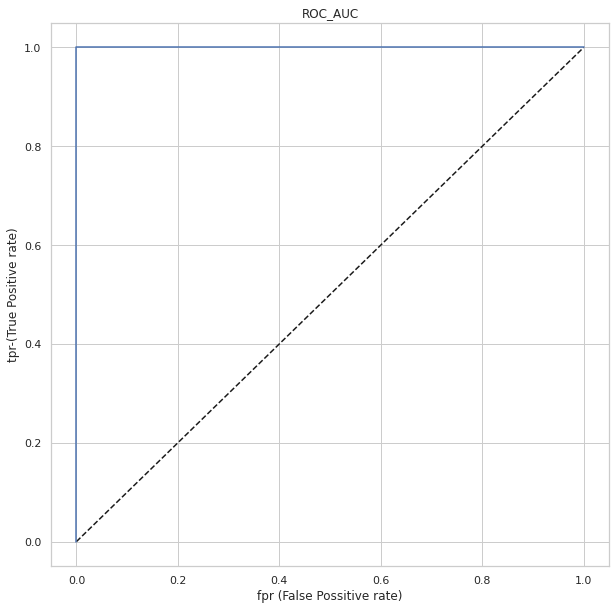

In [88]:
metrics.roc_auc_score(y_test, y_test_pred_prob)
fpr, tpr,thresholds=roc_curve(y_test,y_test_pred_prob)
plt.figure(figsize=(10,10))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel("fpr (False Possitive rate)")
plt.ylabel("tpr-(True Positive rate)")
plt.title("ROC_AUC")
plt.show()

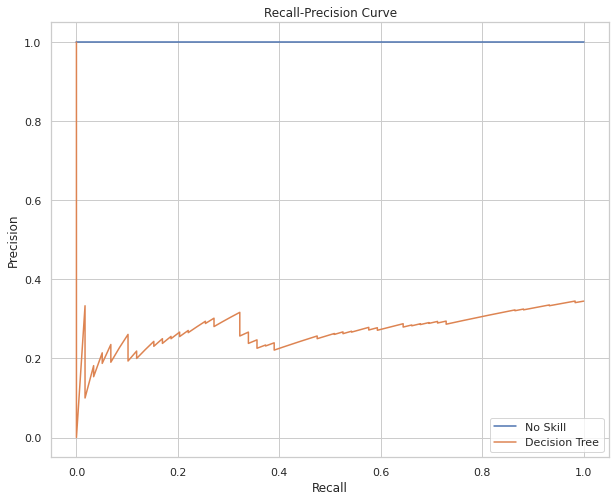

In [89]:
from sklearn.metrics import precision_recall_curve
no_skill=len(y==1)/len(y)
y_test_prob=lr.predict_proba(X_test)[:,1]
plt.figure(figsize=(10,8))
plt.plot([0,1],[no_skill, no_skill], label="No Skill")
precision, recall,_ =precision_recall_curve(y_test, y_test_prob)
plt.plot(recall, precision, marker='',label="Decision Tree")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Recall-Precision Curve")
plt.legend()
plt.show()

In [90]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 1.0000


Here, the training-set accuracy score is 1.0 while the test-set accuracy to be 1.0. These two values are quite comparable. So, there is no sign of overfitting.

# Visualize decision-trees

[Text(334.8, 326.15999999999997, 'X[1] <= 0.5\ngini = 0.473\nsamples = 398\nvalue = [245, 153]'),
 Text(167.4, 108.72000000000003, 'gini = 0.0\nsamples = 245\nvalue = [245, 0]'),
 Text(502.20000000000005, 108.72000000000003, 'gini = 0.0\nsamples = 153\nvalue = [0, 153]')]

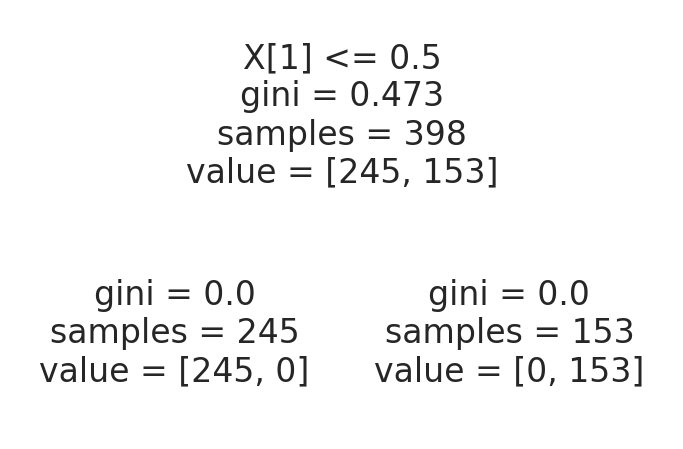

In [91]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train)) 

# Decision Tree Classifier with criterion entropy

In [92]:
# instantiate the DecisionTreeClassifier model with criterion entropy

clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [93]:
y_pred=clf_en.predict(X_train)

In [94]:
print("Accuracy Score:-", metrics.accuracy_score(y_train, y_pred))
print("F1 Score:-", metrics.f1_score(y_train, y_pred))
print("Average Precision Score:-", metrics.average_precision_score(y_train, y_pred))
print("Log Loss:-", metrics.log_loss(y_train, y_pred))
print("Precision Score:-", metrics.precision_score(y_train, y_pred))
print("Recall Score:-", metrics.recall_score(y_train, y_pred))
print("ROC-AUC Score:-", metrics.roc_auc_score(y_train, y_pred))

Accuracy Score:- 1.0
F1 Score:- 1.0
Average Precision Score:- 1.0
Log Loss:- 9.992007221626413e-16
Precision Score:- 1.0
Recall Score:- 1.0
ROC-AUC Score:- 1.0


In [95]:
y_test_pred=clf_en.predict(X_test)


In [96]:
dc_en_acc=metrics.accuracy_score(y_test, y_test_pred)
print("Accuracy Score:-",dc_en_acc)
print("F1 Score:-", metrics.f1_score(y_test, y_test_pred))
print("Average Precision Score:-", metrics.average_precision_score(y_test, y_test_pred))
print("Log Loss:-", metrics.log_loss(y_test, y_test_pred))
print("Precision Score:-", metrics.precision_score(y_test, y_test_pred))
print("Recall Score:-", metrics.recall_score(y_test, y_test_pred))
print("ROC-AUC Score:-", metrics.roc_auc_score(y_test, y_test_pred))

Accuracy Score:- 1.0
F1 Score:- 1.0
Average Precision Score:- 1.0
Log Loss:- 9.992007221626413e-16
Precision Score:- 1.0
Recall Score:- 1.0
ROC-AUC Score:- 1.0


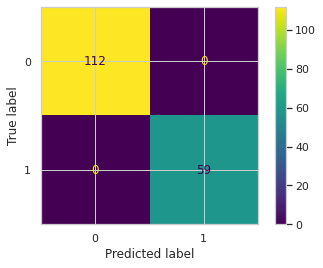

In [97]:
cfm=confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cfm,
                               display_labels=clf_en.classes_)
disp.plot()

In [98]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       112
           1       1.00      1.00      1.00        59

    accuracy                           1.00       171
   macro avg       1.00      1.00      1.00       171
weighted avg       1.00      1.00      1.00       171



In [99]:
y_test_pred_prob=clf_gini.predict_proba(X_test)[:,1]
y_test_pred_prob

from sklearn.metrics import roc_curve

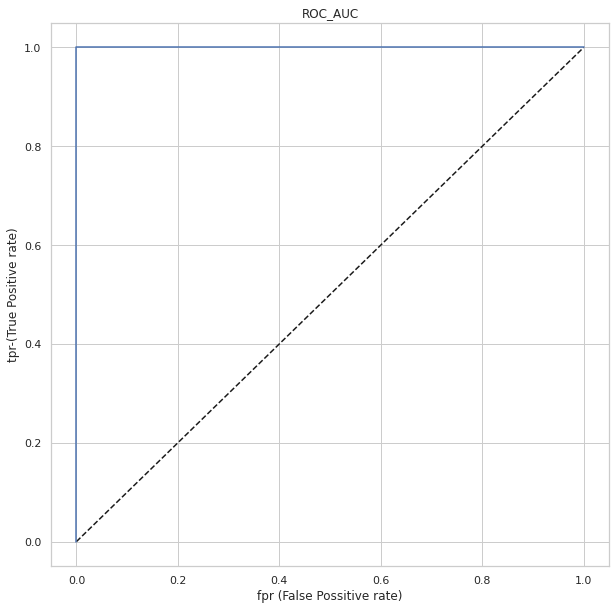

In [100]:
metrics.roc_auc_score(y_test, y_test_pred_prob)
fpr, tpr,thresholds=roc_curve(y_test,y_test_pred_prob)
plt.figure(figsize=(10,10))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr, label='DEcision Tree with Entropy')
plt.xlabel("fpr (False Possitive rate)")
plt.ylabel("tpr-(True Positive rate)")
plt.title("ROC_AUC")
plt.show()

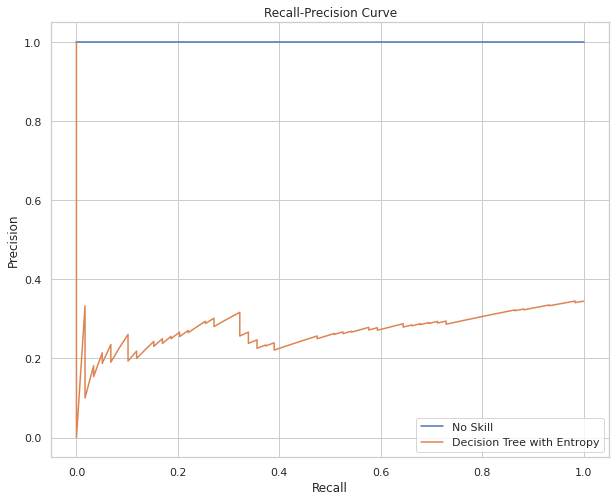

In [101]:
from sklearn.metrics import precision_recall_curve
no_skill=len(y==1)/len(y)
y_test_prob=lr.predict_proba(X_test)[:,1]
plt.figure(figsize=(10,8))
plt.plot([0,1],[no_skill, no_skill], label="No Skill")
precision, recall,_ =precision_recall_curve(y_test, y_test_prob)
plt.plot(recall, precision, marker='',label="Decision Tree with Entropy")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Recall-Precision Curve")
plt.legend()
plt.show()

In [102]:
# predict the test data and show the first 5 predictions
predict=clf_en.predict(X_test)
predict[1:6]

array([0, 0, 1, 0, 0])

In [103]:
#Convert the numericalinto nominal value and check the few result

prediction_nominal=['M' if x<0.1 else 'B' for x in predict ]
prediction_nominal[1:6]

['M', 'M', 'B', 'M', 'M']

# Random Forest Classifiers

In [104]:
# split data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [105]:
# import Random Forest classifier

from sklearn.ensemble import RandomForestClassifier



# instantiate the classifier 

rfc = RandomForestClassifier(random_state=0)



# fit the model

rfc.fit(X_train, y_train)


RandomForestClassifier(random_state=0)

In [106]:
y_pred = rfc.predict(X_train)


In [107]:
print("Accuracy Score:-", metrics.accuracy_score(y_train, y_pred))
print("F1 Score:-", metrics.f1_score(y_train, y_pred))
print("Average Precision Score:-", metrics.average_precision_score(y_train, y_pred))
print("Log Loss:-", metrics.log_loss(y_train, y_pred))
print("Precision Score:-", metrics.precision_score(y_train, y_pred))
print("Recall Score:-", metrics.recall_score(y_train, y_pred))
print("ROC-AUC Score:-", metrics.roc_auc_score(y_train, y_pred))

Accuracy Score:- 1.0
F1 Score:- 1.0
Average Precision Score:- 1.0
Log Loss:- 9.992007221626413e-16
Precision Score:- 1.0
Recall Score:- 1.0
ROC-AUC Score:- 1.0


In [108]:
y_test_pred=rfc.predict(X_test)


In [109]:
rfc_acc=metrics.accuracy_score(y_test, y_test_pred)
print("Accuracy Score:-",rfc_acc)
print("F1 Score:-", metrics.f1_score(y_test, y_test_pred))
print("Average Precision Score:-", metrics.average_precision_score(y_test, y_test_pred))
print("Log Loss:-", metrics.log_loss(y_test, y_test_pred))
print("Precision Score:-", metrics.precision_score(y_test, y_test_pred))
print("Recall Score:-", metrics.recall_score(y_test, y_test_pred))
print("ROC-AUC Score:-", metrics.roc_auc_score(y_test, y_test_pred))

Accuracy Score:- 1.0
F1 Score:- 1.0
Average Precision Score:- 1.0
Log Loss:- 9.992007221626413e-16
Precision Score:- 1.0
Recall Score:- 1.0
ROC-AUC Score:- 1.0


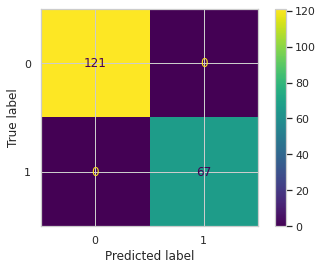

In [110]:
cfm=confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cfm,
                               display_labels=rfc.classes_)
disp.plot()

In [111]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       121
           1       1.00      1.00      1.00        67

    accuracy                           1.00       188
   macro avg       1.00      1.00      1.00       188
weighted avg       1.00      1.00      1.00       188



In [112]:
y_test_pred_prob=rfc.predict_proba(X_test)[:,1]
y_test_pred_prob

from sklearn.metrics import roc_curve

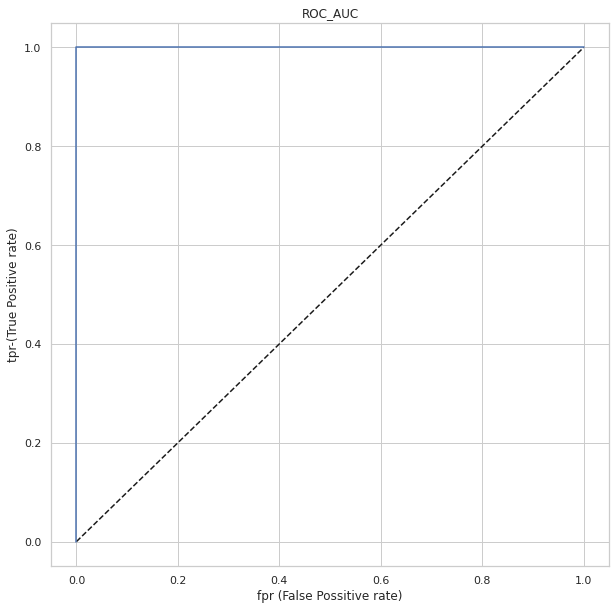

In [113]:
metrics.roc_auc_score(y_test, y_test_pred_prob)
fpr, tpr,thresholds=roc_curve(y_test,y_test_pred_prob)
plt.figure(figsize=(10,10))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr, label='Random Forest')
plt.xlabel("fpr (False Possitive rate)")
plt.ylabel("tpr-(True Positive rate)")
plt.title("ROC_AUC")
plt.show()

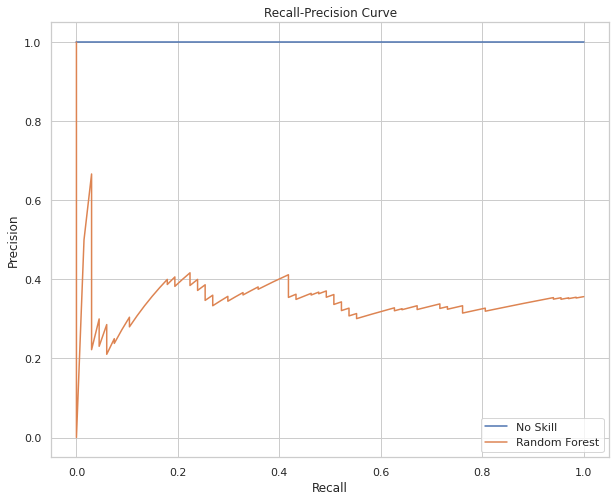

In [114]:
from sklearn.metrics import precision_recall_curve
no_skill=len(y==1)/len(y)
y_test_prob=lr.predict_proba(X_test)[:,1]
plt.figure(figsize=(10,8))
plt.plot([0,1],[no_skill, no_skill], label="No Skill")
precision, recall,_ =precision_recall_curve(y_test, y_test_prob)
plt.plot(recall, precision, marker='',label="Random Forest")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Recall-Precision Curve")
plt.legend()
plt.show()

In [115]:
# predict the test data and show the first 5 predictions
predict=rfc.predict(x_test)
predict[1:6]

array([0, 0, 1, 0, 0])

In [116]:
prediction_nominal=['M' if x<0.1 else 'B' for x in predict ]
prediction_nominal[1:6]

['M', 'M', 'B', 'M', 'M']

# Conclusion:
* as we can see that using the all features of tha dataset we get the accuract level of 100% which itself shows that it is overfitting condition .
* It is the first attempt using all the features of the dataset and predict the accuracy level
* Next job is to predicting the accuracu after removing the some of the existing features of the dataset
* If we get the accuracy level within 100 % , we can say it works.

# Resource
* Random FOrest- https://www.kaggle.com/prashant111/random-forest-classifier-tutorial
* Decision Tree - https://www.kaggle.com/prashant111/decision-tree-classifier-tutorial
* SVC- https://www.kaggle.com/nirajvermafcb/support-vector-machine-detail-analysis